In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('churn modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.shape

(10000, 12)

In [6]:
df.isna().sum()

RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
X = df.drop('Exited', 1)
y = df.Exited

C:\Users\mylie\AppData\Local\Temp/ipykernel_34752/226370341.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('Exited', 1)


In [8]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [10]:
X.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [11]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_cols = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

In [12]:
ct = ColumnTransformer([
    ('s1', RobustScaler(), num_cols),
    ('s2', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [13]:
p = Pipeline([
    ('ct', ct),
    ('mod', LogisticRegression(random_state=0))
])

In [14]:
p.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('s1', RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('s2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('mod', LogisticRegression(random_state=0))])

In [15]:
# predictions are for the default threshold of 0.5
preds = p.predict(X_test)
preds[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
# real class labels of the first 15 people in the test set
np.array(y_test)[:15]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [18]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[1530,   63],
       [ 319,   88]], dtype=int64)

In [19]:
p.classes_

array([0, 1], dtype=int64)

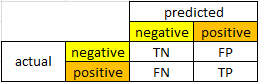

And if we want to switch the class label positions:

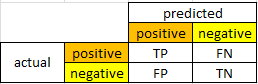

In [20]:
confusion_matrix(y_test, preds, labels=(1,0))

array([[  88,  319],
       [  63, 1530]], dtype=int64)

In [21]:
confusion_matrix(y_test, preds, labels=(1,0)).ravel()

array([  88,  319,   63, 1530], dtype=int64)

In [22]:
tp, fn, fp, tn = confusion_matrix(y_test, preds, labels=(1,0)).ravel()

In [23]:
precision = tp/(tp+fp)
precision

0.5827814569536424

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef

In [25]:
precision_score(y_test, preds)

0.5827814569536424

In [43]:
accuracy_score(y_test,preds)

0.809

In [26]:
recall_score(y_test, preds)

0.21621621621621623

In [27]:
# harmonic mean of precision and recall
f1_score(y_test, preds)

0.31541218637992835

In [28]:
# Precision more weight than recall (beta < 1)
fbeta_score(y_test, preds, beta=0.5)

0.4352126607319486

## Plotting ROC & Precision-Recall Curves using sklearn functions

In [31]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

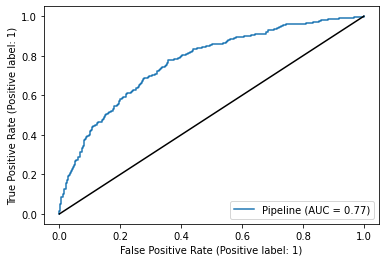

In [32]:
plot_roc_curve(p, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

In [33]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [34]:
407/(1593+407)

0.2035

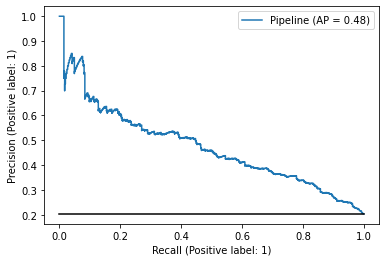

In [35]:
plot_precision_recall_curve(p, X_test, y_test)
plt.plot([0,1], [0.2035,0.2035], c='k')
plt.legend(loc='best')

In [36]:
probs = p.predict_proba(X_test)[:, 1]
probs

array([0.50220097, 0.09743678, 0.26815384, ..., 0.15489024, 0.47404679,
       0.07991856])

In [37]:
p.classes_

array([0, 1], dtype=int64)

In [38]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [39]:
roc_auc_score(y_test, probs)

0.7659739863129692

In [40]:
average_precision_score(y_test, probs)

0.475147561400464